## Comparing Reconstructions

### Overview

This notebook goes through the following themes:

- Creating motion paths
- Compare aspects of different reconstruction models


In [1]:
import numpy as np
import pygplates
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
## SOLUTION 1
def get_motion_path(rotation_filename,SeedPoint,MovingPlate,RelativePlate,times):
    
    # Create a motion path feature
    digitisation_time = 0
    seed_points_at_digitisation_time = pygplates.MultiPointOnSphere([SeedPoint]) 
    motion_path_feature = pygplates.Feature.create_motion_path(
            seed_points_at_digitisation_time,
            times,
            valid_time=(200, 0),
            relative_plate=RelativePlate,
            reconstruction_plate_id = MovingPlate)

    # Create the shape of the motion path
    reconstruction_time = 0
    reconstructed_motion_paths = []
    pygplates.reconstruct(
            motion_path_feature, rotation_filename, reconstructed_motion_paths, reconstruction_time,
            reconstruct_type=pygplates.ReconstructType.motion_path)

    # get the reconstructed coordinates into numpy arrays
    for reconstructed_motion_path in reconstructed_motion_paths:
        trail = reconstructed_motion_path.get_motion_path().to_lat_lon_array()
      
    # when returning the trail, here we flip the array so that the order 
    # matches the 'times' array that we define as an input
    return np.flipud(trail)


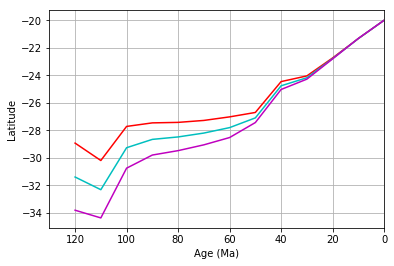

In [3]:
#### EXAMPLE USAGE 1
# Plot curves for three seed points on Africa
rotation_filename = 'Data/Seton_etal_ESR2012_2012.1.rot'
MovingPlate = 701
RelativePlate = 0
times = np.arange(0,130,10)

# get motion paths for three different points in Africa, at the same latitude but
# different longitudes
trail_1 = get_motion_path(rotation_filename,(-20,0),MovingPlate,RelativePlate,times)
trail_2 = get_motion_path(rotation_filename,(-20,5),MovingPlate,RelativePlate,times)
trail_3 = get_motion_path(rotation_filename,(-20,10),MovingPlate,RelativePlate,times)

plt.plot(times,trail_1[:,0],'r')
plt.plot(times,trail_2[:,0],'c')
plt.plot(times,trail_3[:,0],'m')
plt.xlim(130,0)
plt.xlabel('Age (Ma)')
plt.ylabel('Latitude')
plt.grid()
plt.show()

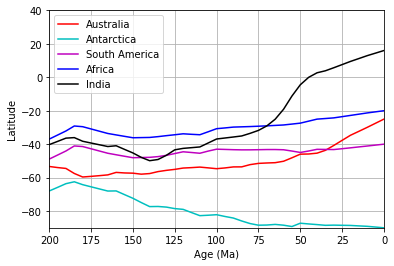

In [4]:
#### EXAMPLE USAGE 1
# Plot curves for three seed points on Africa
rotation_filename = 'Data/Seton_etal_ESR2012_2012.1.rot'
MovingPlate = 701
RelativePlate = 0
times = np.arange(0,201,5)

# get motion paths for three different points in Africa, at the same latitude but
# different longitudes
trail_1 = get_motion_path(rotation_filename,(-25,140),801,RelativePlate,times)
trail_2 = get_motion_path(rotation_filename,(-90,0),802,RelativePlate,times)
trail_3 = get_motion_path(rotation_filename,(-40,-50),201,RelativePlate,times)
trail_4 = get_motion_path(rotation_filename,(-20,10),701,RelativePlate,times)
trail_5 = get_motion_path(rotation_filename,(16,78),501,RelativePlate,times)

plt.plot(times,trail_1[:,0],'r',label='Australia')
plt.plot(times,trail_2[:,0],'c',label='Antarctica')
plt.plot(times,trail_3[:,0],'m',label='South America')
plt.plot(times,trail_4[:,0],'b',label='Africa')
plt.plot(times,trail_5[:,0],'k',label='India')
plt.xlim(200,0)
plt.ylim(-90,40)
plt.xlabel('Age (Ma)')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.grid()
plt.show()

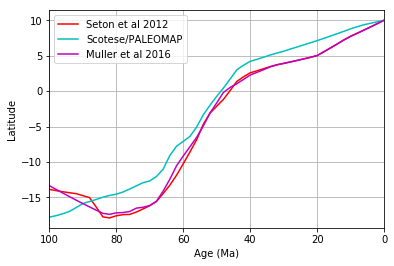

In [5]:
#### EXAMPLE USAGE 2

# specify filenames for three alternative rotation models
rotation_filename1 = 'Data/Seton_etal_ESR2012_2012.1.rot'
rotation_filename2 = 'Data/PALEOMAP_PlateModel.rot'
rotation_filename3 = 'Data/Global_EarthByte_230-0Ma_GK07_AREPS.rot'
SeedPoint = (10,51)
MovingPlate = 501
RelativePlate = 301
times = np.arange(0,101,2)

# call the function for each rotation model, all other parameters remaining the same
trail_1 = get_motion_path(rotation_filename1,SeedPoint,MovingPlate,RelativePlate,times)
trail_2 = get_motion_path(rotation_filename2,SeedPoint,MovingPlate,RelativePlate,times)
trail_3 = get_motion_path(rotation_filename3,SeedPoint,MovingPlate,RelativePlate,times)

plt.plot(times,trail_1[:,0],'r',label='Seton et al 2012')
plt.plot(times,trail_2[:,0],'c',label='Scotese/PALEOMAP')
plt.plot(times,trail_3[:,0],'m',label='Muller et al 2016')
plt.xlim(100,0)
plt.xlabel('Age (Ma)')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.grid()
plt.show()
